In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Meteorological Indicators
* Indicator	Description
* WS10M_MIN:	Minimum Wind Speed at 10 Meters (m/s)
* QV2M:	Specific Humidity at 2 Meters (g/kg)
* T2M_RANGE:	Temperature Range at 2 Meters (C)
* WS10M:	Wind Speed at 10 Meters (m/s)
* T2M:	Temperature at 2 Meters (C)
* WS50M_MIN:	Minimum Wind Speed at 50 Meters (m/s)
* T2M_MAX:	Maximum Temperature at 2 Meters (C)
* WS50M:	Wind Speed at 50 Meters (m/s)
* TS:	Earth Skin Temperature (C)
* WS50M_RANGE:	Wind Speed Range at 50 Meters (m/s)
* WS50M_MAX:	Maximum Wind Speed at 50 Meters (m/s)
* WS10M_MAX:	Maximum Wind Speed at 10 Meters (m/s)
* WS10M_RANGE:	Wind Speed Range at 10 Meters (m/s)
* PS:	Surface Pressure (kPa)
* T2MDEW:	Dew/Frost Point at 2 Meters (C)
* T2M_MIN:	Minimum Temperature at 2 Meters (C)
* T2MWET:	Wet Bulb Temperature at 2 Meters (C)
* PRECTOT:	Precipitation (mm day-1)

In [2]:
df = pd.read_csv('test_timeseries/test_timeseries.csv',parse_dates=['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271948 entries, 0 to 2271947
Data columns (total 21 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fips         int64         
 1   date         datetime64[ns]
 2   PRECTOT      float64       
 3   PS           float64       
 4   QV2M         float64       
 5   T2M          float64       
 6   T2MDEW       float64       
 7   T2MWET       float64       
 8   T2M_MAX      float64       
 9   T2M_MIN      float64       
 10  T2M_RANGE    float64       
 11  TS           float64       
 12  WS10M        float64       
 13  WS10M_MAX    float64       
 14  WS10M_MIN    float64       
 15  WS10M_RANGE  float64       
 16  WS50M        float64       
 17  WS50M_MAX    float64       
 18  WS50M_MIN    float64       
 19  WS50M_RANGE  float64       
 20  score        float64       
dtypes: datetime64[ns](1), float64(19), int64(1)
memory usage: 364.0 MB
None


In [16]:
df.tail()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2271943,56043,2020-12-27,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,...,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,...,-10.61,1.83,2.81,0.10,2.72,2.52,3.69,0.14,3.56,NaN
2271945,56043,2020-12-29,0.00,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,...,-10.81,2.70,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5182
2271946,56043,2020-12-30,0.01,82.87,1.57,-6.40,-13.94,-10.17,1.33,-12.16,...,-8.74,2.93,4.10,1.62,2.48,4.42,6.05,2.79,3.26,NaN
2271947,56043,2020-12-31,0.00,82.82,2.13,-3.83,-10.12,-6.98,2.16,-8.57,...,-6.61,2.16,3.72,0.31,3.41,3.39,6.46,0.41,6.06,NaN


In [3]:
print(df.isnull().sum())

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          1945608
dtype: int64


In [4]:
# number of regions
df['fips'].nunique()

3108

<AxesSubplot:>

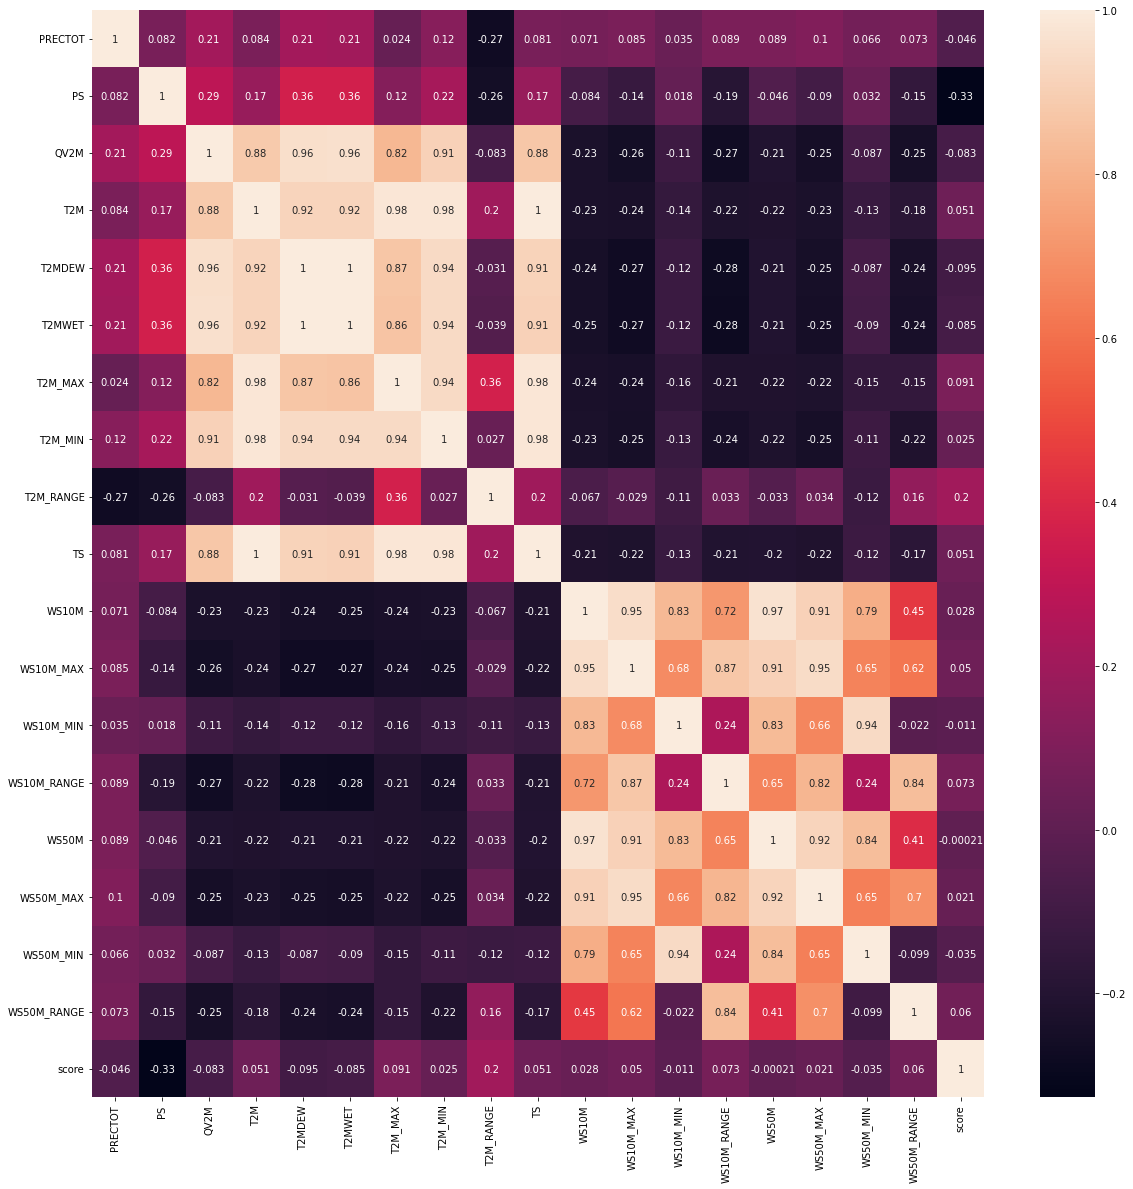

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns=['fips','date']).corr(),annot=True)

In [11]:
new_df = df[['fips','date', 'PRECTOT', 'PS', 'T2M', 'T2M_RANGE', 'WS10M', 'WS50M_RANGE','score']]

In [12]:
print(new_df[new_df['date'].dt.weekday == 1]['score'].isnull().sum())

0


In [13]:
new_df = new_df[(df['date'] > pd.Timestamp(2019,1,1)) & (df['date'] < pd.Timestamp(2020,12,30))]

In [14]:
new_df

,fips,date,PRECTOT,PS,T2M,T2M_RANGE,WS10M,WS50M_RANGE,score
1,1001,2019-01-02,4.94,100.48,13.05,8.23,1.02,2.81,NaN
2,1001,2019-01-03,20.74,100.03,12.12,3.30,1.83,6.77,NaN
3,1001,2019-01-04,16.17,99.47,11.80,12.75,3.75,4.71,NaN
4,1001,2019-01-05,0.01,100.39,7.91,10.69,2.32,2.72,NaN
5,1001,2019-01-06,0.00,100.69,10.26,16.07,1.37,4.58,NaN
...,...,...,...,...,...,...,...,...,...
2271941,56043,2020-12-25,0.00,83.10,-3.65,13.00,4.06,3.59,NaN
2271942,56043,2020-12-26,1.29,82.50,-1.78,7.87,4.29,3.95,NaN
2271943,56043,2020-12-27,3.83,82.91,-3.61,9.31,2.98,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,-7.31,10.03,1.83,3.56,NaN


In [17]:
# get the mean of data per week 
week_df = new_df.groupby('fips').resample('W-TUE', on='date', label='right',closed='right').mean()
week_df = week_df.drop(columns=['fips']).reset_index()

Text(0.5, 0, 'Class')

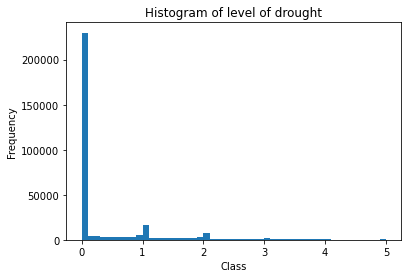

In [18]:
# plt hist of drought
week_df['score'].plot.hist(bins=50)
plt.title('Histogram of level of drought')
plt.xlabel('Class')

In [19]:
# check for week dataframe having any null score
week_df[week_df['score'].isnull()]

,fips,date,PRECTOT,PS,T2M,T2M_RANGE,WS10M,WS50M_RANGE,score


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

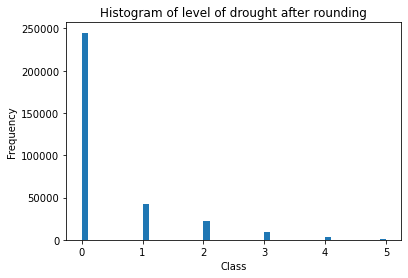

In [20]:
# round score column of week dataframe and make bar plot
week_df['score'] = week_df['score'].round().astype(int)
week_df['score'].plot.hist(bins=50)
plt.title('Histogram of level of drought after rounding')
plt.xlabel('Class')
plt.xticks(rotation=0)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_2032/3682234532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(week_df.corr(),annot=True)


<AxesSubplot:>

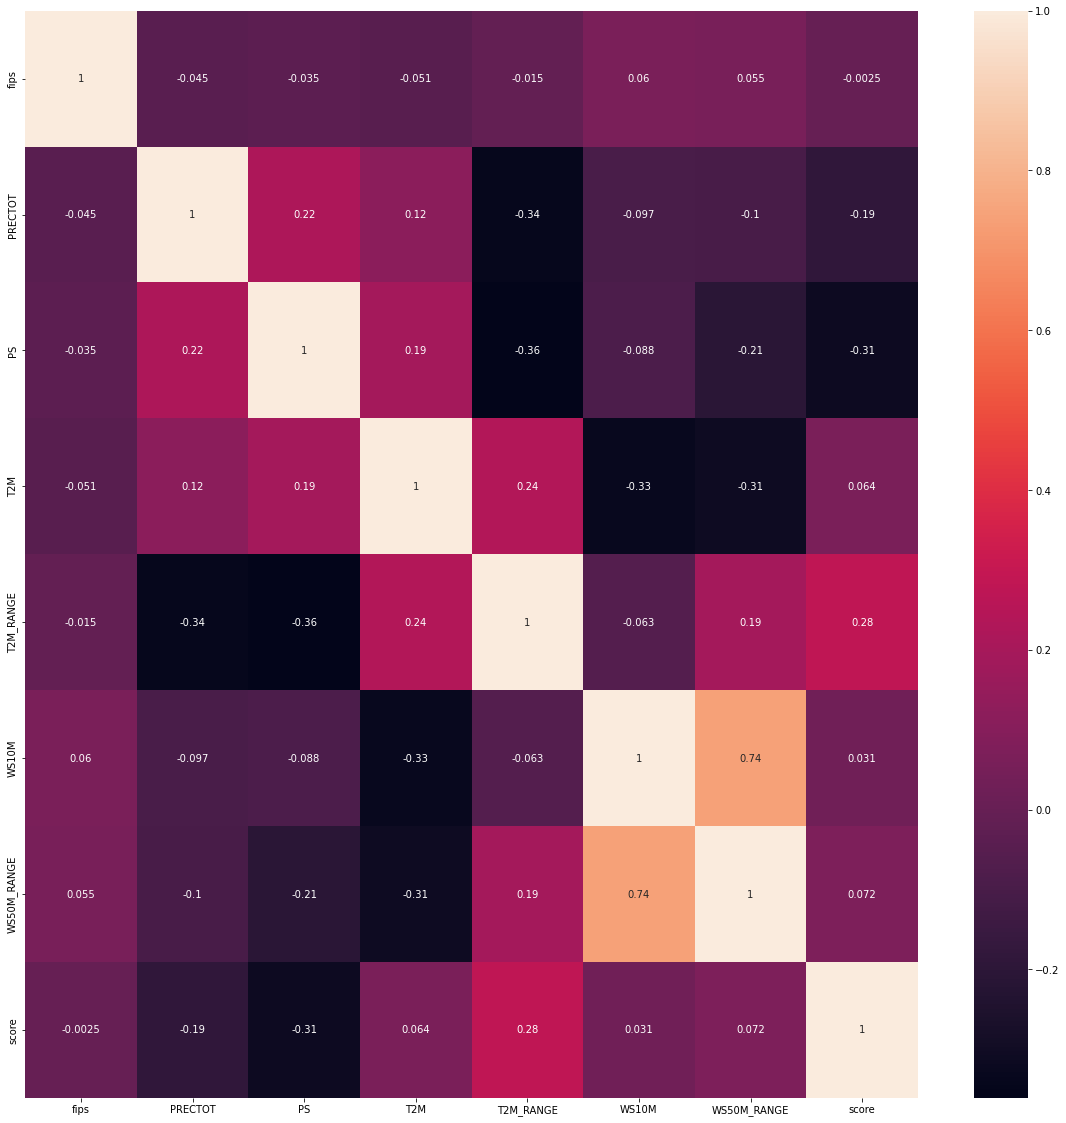

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(week_df.corr(),annot=True)
#week_df['score'].value_counts().plot.bar()

In [37]:
from IPython.display import display

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [25]:
drought_df = pd.read_csv('train_timeseries/train_timeseries.csv')
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [26]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [28]:
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [29]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df = drought_df.drop('date', 1)

In [33]:
drought_df['score'] = drought_df['score'].round().astype(int)
#drought_df.dtypes

In [34]:
drought_df['fips'].nunique()

3108

In [35]:
drought_df['score'].value_counts()

0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: score, dtype: int64

### Univariate Statistics

In [40]:
# Descriptive statistics
display(drought_df.describe()) # For numeric columns
#display(drought_df.describe(include=['object'])) # For Categorical columns
print("\nSkewness: \n", drought_df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", drought_df.kurtosis(axis = 0, skipna = True))

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,...,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06
mean,3.067038e+04,2.714566e+00,9.664736e+01,7.875770e+00,1.289923e+01,7.049350e+00,7.084938e+00,1.876711e+01,7.519916e+00,1.124720e+01,...,1.920655e+00,3.282268e+00,5.532799e+00,7.828799e+00,3.121578e+00,4.707223e+00,8.231266e-01,2.007999e+03,6.520857e+00,1.568997e+01
std,1.497911e+04,6.247590e+00,5.444698e+00,4.721459e+00,1.097040e+01,1.019765e+01,1.014364e+01,1.160295e+01,1.061818e+01,4.038022e+00,...,1.342458e+00,1.943136e+00,2.298550e+00,2.836618e+00,2.109945e+00,2.181020e+00,1.239070e+00,4.897714e+00,3.447033e+00,8.798878e+00
min,1.001000e+03,0.000000e+00,6.649000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.003000e+01,-4.085000e+01,1.600000e-01,...,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,0.000000e+00,9.583000e+01,3.810000e+00,4.580000e+00,-8.800000e-01,-8.400000e-01,1.036000e+01,-5.700000e-01,8.370000e+00,...,9.600000e-01,1.820000e+00,3.820000e+00,5.700000e+00,1.450000e+00,3.140000e+00,0.000000e+00,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,1.900000e-01,9.828000e+01,6.940000e+00,1.421000e+01,7.810000e+00,7.810000e+00,2.062000e+01,8.260000e+00,1.120000e+01,...,1.660000e+00,2.820000e+00,5.150000e+00,7.350000e+00,2.770000e+00,4.270000e+00,0.000000e+00,2.008000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,2.260000e+00,9.994000e+01,1.145000e+01,2.200000e+01,1.567000e+01,1.567000e+01,2.797000e+01,1.628000e+01,1.408000e+01,...,2.570000e+00,4.280000e+00,6.880000e+00,9.490000e+00,4.390000e+00,5.810000e+00,1.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,1.686900e+02,1.037600e+02,2.212000e+01,3.933000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.228000e+01,3.017000e+01,...,1.462000e+01,1.872000e+01,2.247000e+01,2.833000e+01,1.778000e+01,2.337000e+01,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01



Skewness: 
 fips          -0.077367
PRECTOT        4.568803
PS            -2.132573
QV2M           0.526605
T2M           -0.426059
T2MDEW        -0.302684
T2MWET        -0.289061
T2M_MAX       -0.467449
T2M_MIN       -0.365648
T2M_RANGE      0.092413
TS            -0.396537
WS10M          1.112524
WS10M_MAX      0.931888
WS10M_MIN      1.400951
WS10M_RANGE    1.287969
WS50M          0.861690
WS50M_MAX      0.899830
WS50M_MIN      0.860444
WS50M_RANGE    1.214403
score          1.498394
year          -0.000183
month         -0.008198
day            0.006969
dtype: float64

Kurtosis: 
 fips           -1.100136
PRECTOT        33.304567
PS              4.813301
QV2M           -0.786067
T2M            -0.554336
T2MDEW         -0.733896
T2MWET         -0.758504
T2M_MAX        -0.508101
T2M_MIN        -0.446940
T2M_RANGE      -0.316984
TS             -0.535722
WS10M           1.419724
WS10M_MAX       0.705953
WS10M_MIN       3.159288
WS10M_RANGE     2.084432
WS50M           0.819908
WS50M_M

In [41]:
column_list = list(drought_df.columns)
column_list

['fips',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

In [42]:
measures_column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
drought_df_measures = drought_df[measures_column_list]

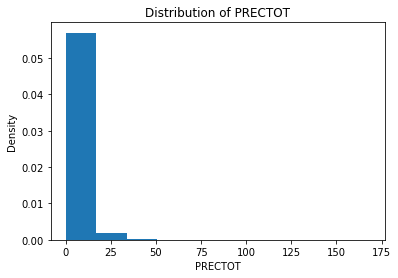

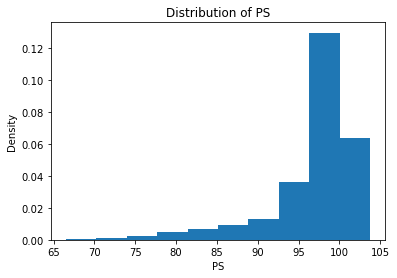

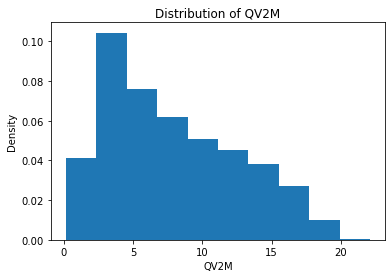

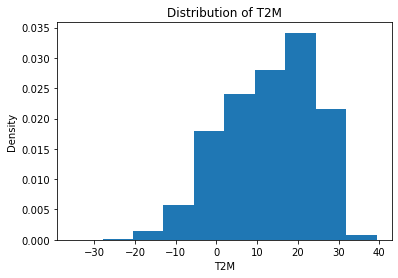

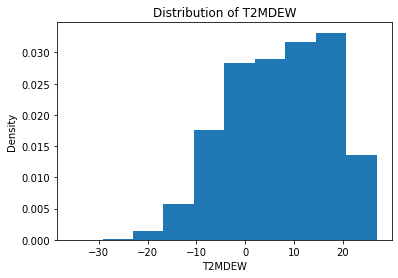

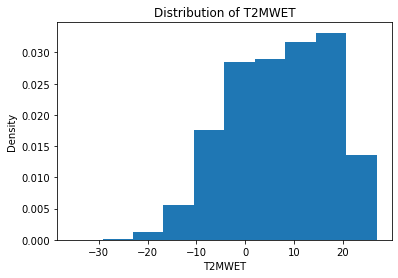

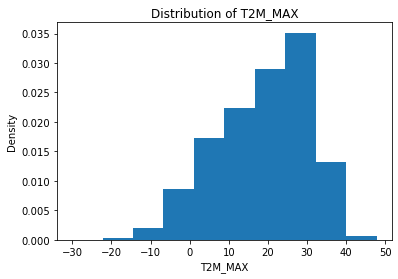

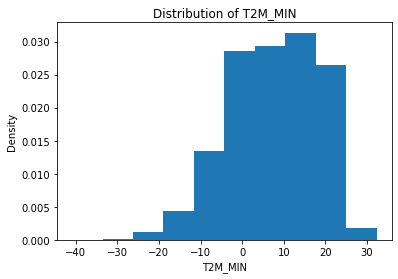

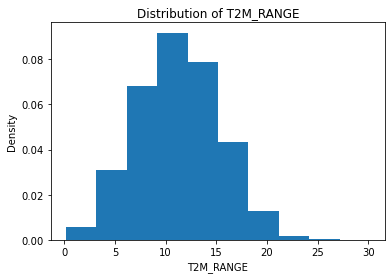

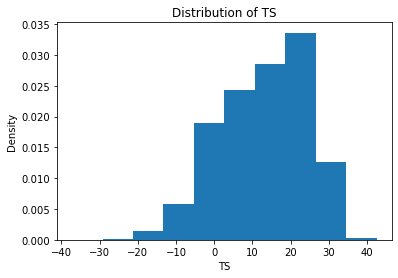

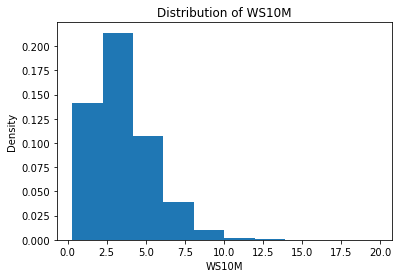

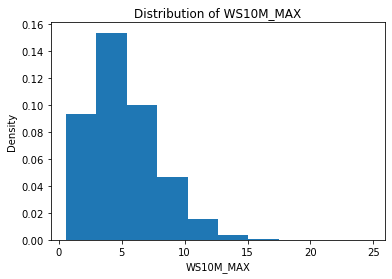

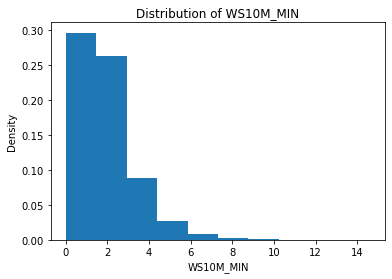

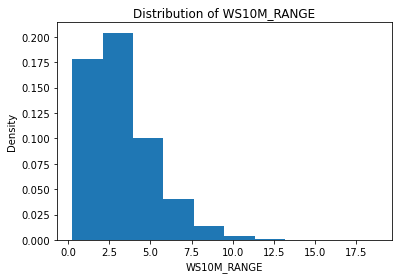

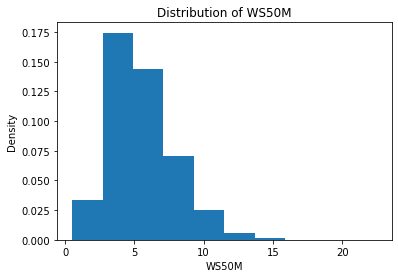

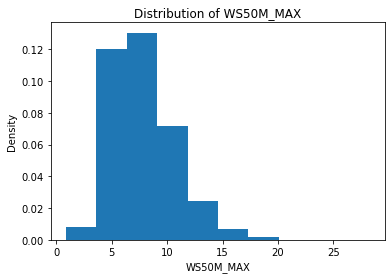

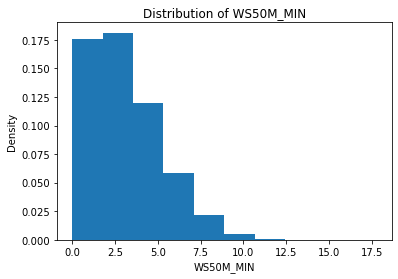

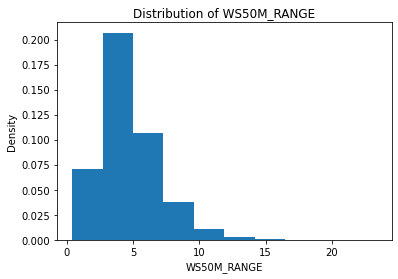

In [43]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

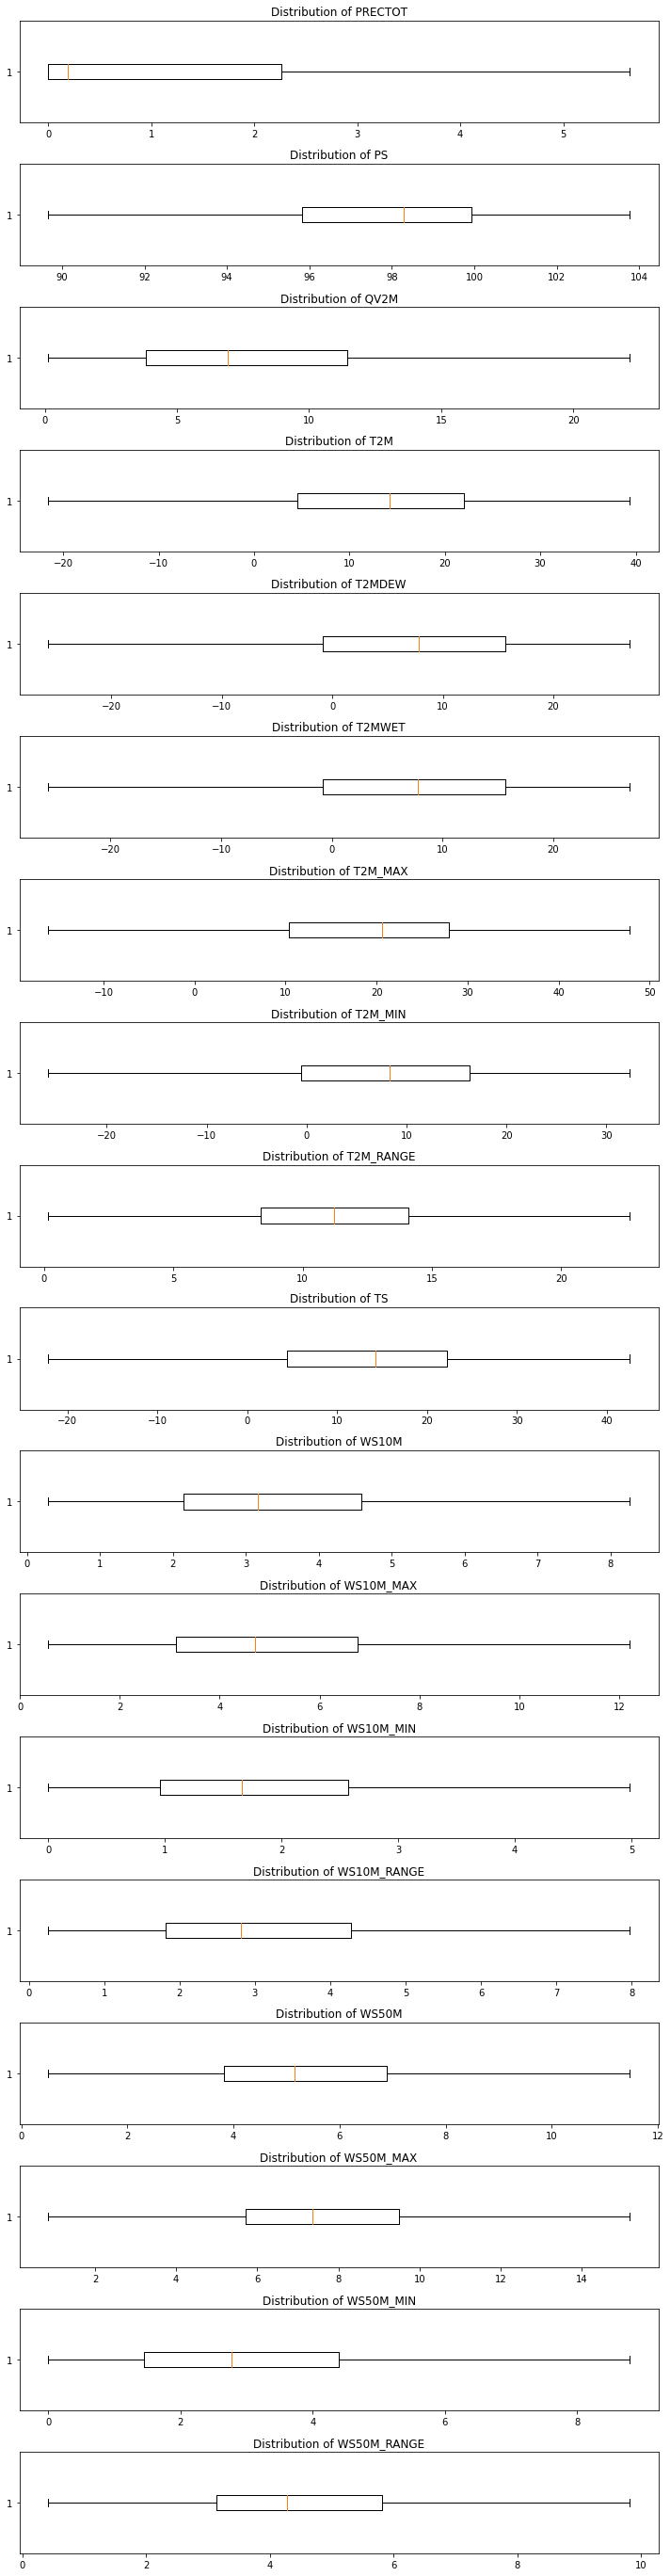

In [44]:
# Idenftify Outliers
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    plt.boxplot(x= drought_df_measures.iloc[:, x-1], vert=False, showfliers=False)
    x_name = drought_df_measures.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [45]:
#Remove Outlier
for col_name in measures_column_list:
    q1 = drought_df[col_name].quantile(0.25)
    q3 = drought_df[col_name].quantile(0.75)
    iqr = q3-q1
    k = 1.5
    cutoff = iqr * k
    drought_df = drought_df[(drought_df[col_name] >= q1 - cutoff) & (drought_df[col_name] <= q3 + cutoff)]

print('Total rows = ',len(drought_df.index))

Total rows =  1895053


In [46]:
categorical_column_list = ['score','year','month','day']
drought_df_categorical = drought_df[['score','year','month','day']]

<Figure size 720x2880 with 0 Axes>

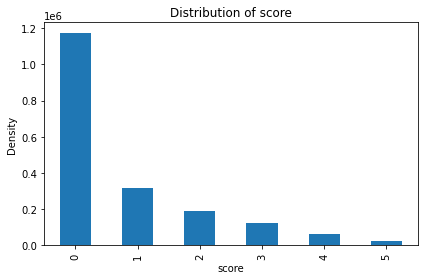

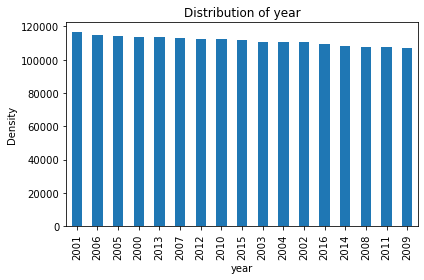

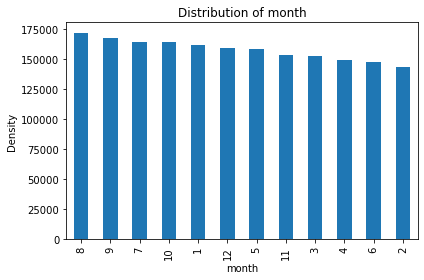

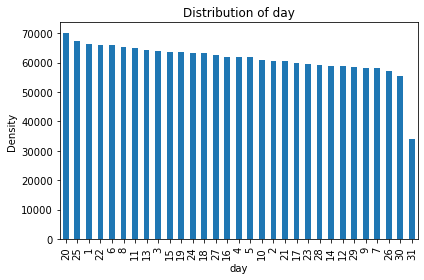

In [47]:
# Distribution of categorical variables
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()

In [48]:
independent_variables = drought_df.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1
38,0.00,101.04,5.01,8.88,3.90,3.91,17.64,2.65,14.99,8.31,...,2.04,0.48,1.55,2.74,5.33,0.69,4.63,2000,2,8


In [49]:
target = drought_df['score']
target.head()

10    2
17    2
24    2
31    1
38    1
Name: score, dtype: int32

In [50]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

In [51]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (1516042, 21)
Train target shape (1516042,)
Test features shape (379011, 21)
Test target shape (379011,)


In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.32898566,  0.40498229, -0.74785048, ..., -0.39783816,
        -1.03933211,  1.40279013],
       [-0.5725144 ,  0.67618357,  0.88826072, ..., -0.60147439,
         0.70578913,  1.28893431],
       [-0.54109134, -0.74297927, -1.10683764, ..., -1.21238308,
        -1.62103919,  0.71965517],
       ...,
       [-0.5725144 , -1.17764433, -0.56726905, ...,  1.43488791,
         0.70578913,  0.71965517],
       [ 0.44087941,  0.20065257,  1.00139607, ..., -1.21238308,
         0.41493559,  1.28893431],
       [-0.56465864,  0.77649089, -0.08426814, ..., -0.19420193,
        -1.33018565,  1.28893431]])

In [53]:
pca = PCA(.90)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print("Number of components after PCA: ", pca.n_components_)

Number of components after PCA:  7


In [54]:
knn = KNeighborsClassifier()

k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, scoring='accuracy', return_train_score=False,verbose=1) 
grid_search=grid.fit(X_train, y_train)

print("Most Accurate n is: ", grid_search.best_params_["n_neighbors"])
knn.set_params({"n_neighbors": grid_search.best_params_["n_neighbors"]})
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Most Accurate n is:  1


TypeError: set_params() takes 1 positional argument but 2 were given

In [ ]:
print('KNN:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))

In [58]:
DT_classifier_NM = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM.fit(X_train,y_train)
y_pred_NM = DT_classifier_NM.predict(X_test)

In [59]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling:\n')
print(confusion_matrix(y_test, y_pred_NM))
print(classification_report(y_test, y_pred_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Performance of Decision Tree Algorithm with Near Miss Downsampling:

[[203456  17945   6853   3741   1665    771]
 [ 19069  35094   6560   1938    831    350]
 [  6713   7487  19407   3903    751    254]
 [  3610   1989   4376  12054   1960    294]
 [  1706    814    904   2290   6072    804]
 [   844    353    241    320    879   2713]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87    234431
           1       0.55      0.55      0.55     63842
           2       0.51      0.50      0.51     38515
           3       0.50      0.50      0.50     24283
           4       0.50      0.48      0.49     12590
           5       0.52      0.51      0.51      5350

    accuracy                           0.74    379011
   macro avg       0.57      0.57      0.57    379011
weighted avg       0.73      0.74      0.74    379011

Accuracy: 0.7355881491566207
Precision: 0.7346921406344423
Recall: 0.7355881491566207
F1 Score: 0.7351307179193208
Co

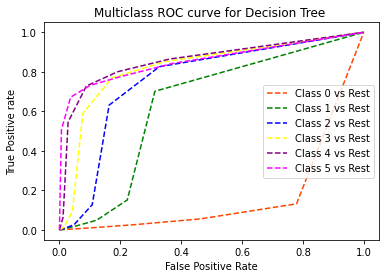

In [60]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

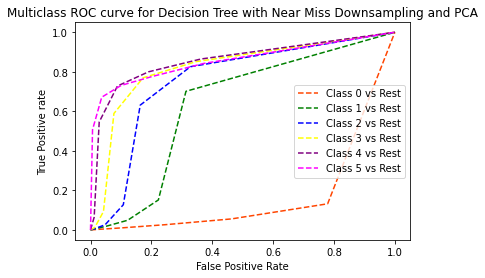

In [64]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with PCA',dpi=300)